# **Assignment \#2**: Machine Learning MC886/MO444
University of Campinas (UNICAMP), Institute of Computing (IC)

Prof. Sandra Avila, 2022s2



In [127]:
# TODO: RA & Name
print(f'RA1: 213259 ' + 'Arthur Baia')
print(f'RA2: 200025 ' + 'José Afonso')


RA1: 213259 Arthur Baia
RA2: 200025 José Afonso


## Objective

Explore **linear regression** and **logistic regression** alternatives and come up with the best possible model for the problems, avoiding overfitting. In particular, predict the performance of students from public schools in the state of São Paulo based on socioeconomic data from SARESP (School Performance Assessment System of the State of São Paulo, or Sistema de Avaliação de Rendimento Escolar do Estado de São Paulo) 2021.

### Dataset

These data were aggregated from [Open Data Platform of the Secretary of Education of the State of São Paulo](https://dados.educacao.sp.gov.br/) (*Portal de Dados Abertos da Secretaria da Educação do Estado de São Paulo*). The dataset is based on two data sources: [SARESP questionnaire](https://dados.educacao.sp.gov.br/dataset/question%C3%A1rios-saresp) and [SARESP test](https://dados.educacao.sp.gov.br/dataset/profici%C3%AAncia-do-sistema-de-avalia%C3%A7%C3%A3o-de-rendimento-escolar-do-estado-de-s%C3%A3o-paulo-saresp-por), conducted in 2021 with students from the 5th and 9th year of Primary School and 3rd year of Highschool. The questionnaire comprehends 63 socio-economical questions, and it is available at the [link](https://dados.educacao.sp.gov.br/sites/default/files/Saresp_Quest_2021_Perguntas_Alunos.pdf ) ([English version](https://docs.google.com/document/d/1GUax3wwYxA43d3iNOiyCRImeCHgx8vUJrHlSzzYIXA4/edit?usp=sharing)), and the test is composed of questions of Portuguese, Mathematics, and Natural Sciences.


**Data Dictionary**:

- **CD_ALUNO**: Student ID;

- **CODESC**: School ID;

- **NOMESC**: School Name;

- **RegiaoMetropolitana**: Metropolitan region;

- **DE**: Name of the Education Board;

- **CODMUN**: City ID;

- **MUN**: City name;

- **SERIE_ANO**: Scholar year;

- **TURMA**: Class;

- **TP_SEXO**: Sex (Female/Male);

- **DT_NASCIMENTO**: Birth date;

- **PERIODO**: Period of study (morning, afternoon, evening);

- **Tem_Nec**: Whether student has any special needs (1 = yes, 0 = no);

- **NEC_ESP_1** - **NEC_ESP_5**: Student disabilities;

- **Tipo_PROVA**: Exam type (A = Enlarged, B = Braile, C = Common);

- **QN**: Student answer to the question N (N= 1, ... , 63), see  questions in [questionnaire](https://dados.educacao.sp.gov.br/sites/default/files/Saresp_Quest_2021_Perguntas_Alunos.pdf ) ([English version](https://docs.google.com/document/d/1GUax3wwYxA43d3iNOiyCRImeCHgx8vUJrHlSzzYIXA4/edit?usp=sharing));

- **porc_ACERT_lp**: Percentage of correct answers in the Portuguese test;

- **porc_ACERT_MAT**: Percentage of correct answers in the Mathematics test;

- **porc_ACERT_CIE**: Percentage of correct answers in the Natural Sciences test;

- **nivel_profic_lp**: Proficiency level in the Portuguese test;

- **nivel_profic_mat**: Proficiency level in the Mathematics test;

- **nivel_profic_cie**:  Proficiency level in the Natural Sciences test.


---



You must respect the following training/test split:
- SARESP_train.csv
- SARESP_test.csv

## Linear Regression

This part of the assignment aims to predict students' performance on Portuguese, Mathematics, and Natural Sciences tests (target values: `porc_ACERT_lp`, `porc_ACERT_MAT`, and  `porc_ACERT_CIE`) based on their socioeconomic data. Then, at this point, you have to **drop the columns `nivel_profic_lp`, `nivel_profic_mat`** and **`nivel_profic_cie`**.

### Activities

1. (3.5 points) Perform Linear Regression. You should implement your solution and compare it with ```sklearn.linear_model.SGDRegressor``` (linear model fitted by minimizing a regularized empirical loss with SGD, http://scikit-learn.org). Keep in mind that friends don't let friends use testing data for training :-)

Note: Before we start an ML project, we always conduct a brief exploratory analysis :D 

Some factors to consider: Are there any outliers? Are there missing values? How will you handle categorical variables? Are there any features with low correlation with the target variables? What happens if you drop them?




---
Step 1: Load data and check it

In [128]:
# TODO: Load and preprocess your dataset.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("SARESP_train.csv")
df_teste = pd.read_csv("SARESP_test.csv")


/tmp/ipykernel_5077/1712878385.py:9: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("SARESP_train.csv")


In [129]:
df

,CD_ALUNO,NOMESC,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,NEC_ESP_4,NEC_ESP_5,Tipo_PROVA,Tem_Nec,porc_ACERT_lp,porc_ACERT_MAT,porc_ACERT_CIE,nivel_profic_lp,nivel_profic_mat,nivel_profic_cie
0,26270013,JULIO FORTES,B,E,E,E,E,E,E,E,...,NaN,NaN,C,0,41.7,20.8,20.8,Abaixo do Básico,Abaixo do Básico,Abaixo do Básico
1,30756614,MESSIAS FREIRE PROFESSOR,B,D,E,C,E,E,E,E,...,NaN,NaN,C,0,83.3,100.0,66.7,Adequado,Avançado,Adequado
2,26014872,JOSE CONTI,B,E,B,D,E,B,D,C,...,NaN,NaN,C,0,58.3,37.5,54.2,Básico,Básico,Básico
3,25739025,NAPOLEAO DE CARVALHO FREIRE PROFESSOR,B,D,E,D,C,E,D,D,...,NaN,NaN,C,0,29.2,29.2,16.7,Abaixo do Básico,Abaixo do Básico,Abaixo do Básico
4,27363009,RESIDENCIAL BORDON,B,D,E,E,E,E,E,C,...,NaN,NaN,C,0,79.2,41.7,50.0,Adequado,Abaixo do Básico,Básico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120591,28799794,ENNIO CHIESA PROFESSOR,A,E,E,E,E,E,E,E,...,NaN,NaN,C,0,79.2,66.7,83.3,Adequado,Básico,Adequado
120592,27825068,HELIO HELENE,B,D,D,D,D,D,D,D,...,NaN,NaN,C,0,37.5,25.0,16.7,Abaixo do Básico,Abaixo do Básico,Abaixo do Básico
120593,23873470,ALBERTO SANTOS DUMONT,A,E,E,E,E,E,D,D,...,NaN,NaN,C,0,50.0,37.5,41.7,Básico,Abaixo do Básico,Abaixo do Básico
120594,31376275,FRANCISCO BONFIM,B,E,C,C,D,B,B,A,...,NaN,NaN,C,1,45.8,70.8,54.2,Abaixo do Básico,Básico,Abaixo do Básico


In [130]:
df.describe()


,CD_ALUNO,CODMUN,CODESC,NEC_ESP_5,Tem_Nec,porc_ACERT_lp,porc_ACERT_MAT,porc_ACERT_CIE
count,1.205960e+05,120596.000000,120596.000000,0.0,120596.000000,120596.000000,120596.000000,120596.000000
mean,2.734087e+07,364.349075,279415.870510,NaN,0.019818,60.151213,52.225829,56.928877
std,2.946464e+06,220.098318,394245.824543,NaN,0.139376,21.730825,21.262466,18.441383
min,1.739548e+07,100.000000,24.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,2.529711e+07,100.000000,15568.000000,NaN,0.000000,41.700000,37.500000,45.800000
50%,2.712102e+07,336.000000,35178.000000,NaN,0.000000,62.500000,50.000000,58.300000
75%,2.910558e+07,582.000000,901573.000000,NaN,0.000000,79.200000,66.700000,70.800000
max,3.796186e+07,793.000000,926103.000000,NaN,1.000000,100.000000,100.000000,100.000000


In [131]:
df.columns


Index(['CD_ALUNO', 'NOMESC', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
       'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18',
       'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28',
       'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38',
       'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48',
       'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58',
       'Q59', 'Q60', 'Q61', 'Q62', 'Q63', 'RegiaoMetropolitana', 'DE',
       'CODMUN', 'MUN', 'CODESC', 'SERIE_ANO', 'TURMA', 'TP_SEXO',
       'DT_NASCIMENTO', 'PERIODO', 'NEC_ESP_1', 'NEC_ESP_2', 'NEC_ESP_3',
       'NEC_ESP_4', 'NEC_ESP_5', 'Tipo_PROVA', 'Tem_Nec', 'porc_ACERT_lp',
       'porc_ACERT_MAT', 'porc_ACERT_CIE', 'nivel_profic_lp',
       'nivel_profic_mat', 'nivel_profic_cie'],
      dtype='object')

---
Step 2: Check NaNs in the dataframe

In [132]:
df.isna().sum(axis=0).sort_values(ascending=False)

NEC_ESP_5           120596
NEC_ESP_4           120595
NEC_ESP_3           120520
NEC_ESP_2           120489
NEC_ESP_1           118206
                     ...  
Q26                      0
Q25                      0
Q24                      0
Q23                      0
nivel_profic_cie         0
Length: 88, dtype: int64

Since there are a lot of NaN's in the NEC_ESP columns, they will be dropped

In [133]:
def drop_nec_columns(df):
    for i in range(1, 6):
        df.drop(columns=[f'NEC_ESP_{i}'], inplace=True)
drop_nec_columns(df)
drop_nec_columns(df_teste)
df.columns

Index(['CD_ALUNO', 'NOMESC', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
       'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18',
       'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28',
       'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38',
       'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48',
       'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58',
       'Q59', 'Q60', 'Q61', 'Q62', 'Q63', 'RegiaoMetropolitana', 'DE',
       'CODMUN', 'MUN', 'CODESC', 'SERIE_ANO', 'TURMA', 'TP_SEXO',
       'DT_NASCIMENTO', 'PERIODO', 'Tipo_PROVA', 'Tem_Nec', 'porc_ACERT_lp',
       'porc_ACERT_MAT', 'porc_ACERT_CIE', 'nivel_profic_lp',
       'nivel_profic_mat', 'nivel_profic_cie'],
      dtype='object')

---
Step 3: Transform data

Based on the questions {Q0, .., Q63} and their meaning and possible values, it's needed to transform them into numerical data

In [134]:

def question_map(df):

    ordinal_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}
    inversed_ordinal_map = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'E': 1}
    dont_know_ordinal_map = {'A': 1, 'B': 2, 'C': 3, 'D': 1, 'E': 2}
    inversed_dont_know_ordinal_map = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'E': 2} #applied penalty for don't know anwser
    home_ordinal_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}
    miss_someone_map = {'A': 1, 'B': 1, 'C': 1, 'D': 0}
    someone_helped_map = {'A': 2, 'B': 1, 'C': 1, 'D': 0}

    for q in range(1, 64):
        if (q <= 8 or (q > 26 and q <= 33) or (q > 33 and q <= 41) or (q > 56 and q <= 58) or q == 60): #ordinal map
            df.replace({f'Q{q}': ordinal_map}, inplace=True)
        elif ((q > 8 and q <= 26) or q == 59):
            df.replace({f'Q{q}': inversed_ordinal_map}, inplace=True) 
        elif (q == 42):
            df.replace({f'Q{q}': inversed_dont_know_ordinal_map}, inplace=True)
        elif (q > 42 and q <= 49):
            df.replace({f'Q{q}': dont_know_ordinal_map}, inplace=True)
        elif (q > 49 and q <= 56):
            df.replace({f'Q{q}': home_ordinal_map}, inplace=True)
        elif (q == 61):
            df.replace({f'Q{q}': miss_someone_map}, inplace=True)
        elif (q == 62):
            df.replace({f'Q{q}': someone_helped_map}, inplace=True)
        else: # 63 question
            df = pd.concat([df, pd.get_dummies(df['Q63'], prefix='Q63')], axis=1)
            df.drop(columns=[ 'Q63'], inplace=True)
    
    return df

df = question_map(df)
df_teste = question_map(df_teste)
df.columns



Index(['CD_ALUNO', 'NOMESC', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
       'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18',
       'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28',
       'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38',
       'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48',
       'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58',
       'Q59', 'Q60', 'Q61', 'Q62', 'RegiaoMetropolitana', 'DE', 'CODMUN',
       'MUN', 'CODESC', 'SERIE_ANO', 'TURMA', 'TP_SEXO', 'DT_NASCIMENTO',
       'PERIODO', 'Tipo_PROVA', 'Tem_Nec', 'porc_ACERT_lp', 'porc_ACERT_MAT',
       'porc_ACERT_CIE', 'nivel_profic_lp', 'nivel_profic_mat',
       'nivel_profic_cie', 'Q63_A', 'Q63_B', 'Q63_C', 'Q63_D'],
      dtype='object')


Considering there are many columns related to geographical columns, { 'RegiaoMetropolitana', 'DE', 'CODMUN', 'MUN', 'CODESC' }, we will select only one column related to this 
matter, because there are no indicator related to social geographical like HDI to correlate to them. Also, if we one hot encode each of these columns there will be a huge increase in dimensionality. So, we will choose the 'Regiao metropolitana' column.

In [135]:
df['RegiaoMetropolitana'].groupby(df['RegiaoMetropolitana']).count()

RegiaoMetropolitana
Interior                                                   39211
Região Metropolitana da Baixada Santista                    7688
Região Metropolitana de Campinas                            3465
Região Metropolitana de Ribeirão Preto                      6712
Região Metropolitana de Sorocaba                            6736
Região Metropolitana de São Paulo                          47437
Região Metropolitana do Vale do Paraíba e Litoral Norte     9347
Name: RegiaoMetropolitana, dtype: int64

In [136]:
def select_geo(df):
    df = pd.concat([df, pd.get_dummies(df['RegiaoMetropolitana'], prefix='RegiaoMetropolitana')], axis=1)
    df.drop(columns=['NOMESC', 'MUN', 'CODESC', 'CODMUN', 'RegiaoMetropolitana',  'DE'], inplace=True)
    return df
df = select_geo(df)
df_teste = select_geo(df_teste)

In [137]:
df._get_numeric_data().columns

Index(['CD_ALUNO', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
       'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40',
       'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50',
       'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60',
       'Q61', 'Q62', 'Tem_Nec', 'porc_ACERT_lp', 'porc_ACERT_MAT',
       'porc_ACERT_CIE', 'Q63_A', 'Q63_B', 'Q63_C', 'Q63_D',
       'RegiaoMetropolitana_Interior',
       'RegiaoMetropolitana_Região Metropolitana da Baixada Santista',
       'RegiaoMetropolitana_Região Metropolitana de Campinas',
       'RegiaoMetropolitana_Região Metropolitana de Ribeirão Preto',
       'RegiaoMetropolitana_Região Metropolitana de Sorocaba',
       'RegiaoMetropolitana_Região Metropolitana de São Paulo',
       'RegiaoMetropolitana_Região Met

In [139]:
def get_categorical_columns(df):
    cols = df.columns

    num_cols = df._get_numeric_data().columns

    return list(set(cols) - set(num_cols))
set(get_categorical_columns(df)) - set(get_categorical_columns(df_teste))

{'nivel_profic_lp'}

In [140]:
df.columns

Index(['CD_ALUNO', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
       'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40',
       'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50',
       'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60',
       'Q61', 'Q62', 'SERIE_ANO', 'TURMA', 'TP_SEXO', 'DT_NASCIMENTO',
       'PERIODO', 'Tipo_PROVA', 'Tem_Nec', 'porc_ACERT_lp', 'porc_ACERT_MAT',
       'porc_ACERT_CIE', 'nivel_profic_lp', 'nivel_profic_mat',
       'nivel_profic_cie', 'Q63_A', 'Q63_B', 'Q63_C', 'Q63_D',
       'RegiaoMetropolitana_Interior',
       'RegiaoMetropolitana_Região Metropolitana da Baixada Santista',
       'RegiaoMetropolitana_Região Metropolitana de Campinas',
       'RegiaoMetropolitana_Região Metropolitana de Ribeirão Preto',
       'RegiaoMet

In [141]:
df_teste.columns

Index(['CD_ALUNO', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
       'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40',
       'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50',
       'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60',
       'Q61', 'Q62', 'SERIE_ANO', 'TURMA', 'TP_SEXO', 'DT_NASCIMENTO',
       'PERIODO', 'Tipo_PROVA', 'Tem_Nec', 'porc_ACERT_lp', 'porc_ACERT_MAT',
       'porc_ACERT_CIE', 'nivel_profic_mat', 'nivel_profic_cie', 'Q63_A',
       'Q63_B', 'Q63_C', 'Q63_D', 'RegiaoMetropolitana_Interior',
       'RegiaoMetropolitana_Região Metropolitana da Baixada Santista',
       'RegiaoMetropolitana_Região Metropolitana de Campinas',
       'RegiaoMetropolitana_Região Metropolitana de Ribeirão Preto',
       'RegiaoMetropolitana_Região Metropol

Since birth date is not a numerical category, we turn it into age (idade column)

In [142]:

from datetime import datetime
from datetime import date


def calculate_age(born):
    born = datetime.strptime(born, "%m/%d/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))


df['idade'] = df['DT_NASCIMENTO'].apply(calculate_age)
df_teste['idade'] = df_teste['DT_NASCIMENTO'].apply(calculate_age)
df = df.drop(columns=['DT_NASCIMENTO'])
df_teste = df_teste.drop(columns=['DT_NASCIMENTO'])
df['idade']


0         18
1         12
2         15
3         18
4         15
          ..
120591    16
120592    13
120593    19
120594    12
120595    17
Name: idade, Length: 120596, dtype: int64

<AxesSubplot:xlabel='idade'>

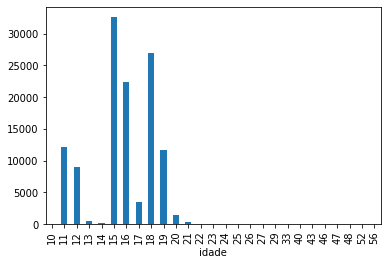

In [143]:
df['idade'].groupby(df['idade']).count().plot(kind='bar')



Mapping categorical features into numerical

In [144]:
def sex_mapper(df):
    sex_map = {'F': 0, 'M': 1}
    df.replace({'TP_SEXO': sex_map}, inplace=True)
    return df
df = sex_mapper(df)
df_teste = sex_mapper(df_teste)


Since more years of schooling may mean more knowledge, we will choose to make SERIE_ANO as ordinal as well.

In [94]:
def school_year_mapper(df): 
    school_year_map = {'EM-3ª série': 3, '9º Ano EF': 2, '5º Ano EF': 1}
    df.replace({'SERIE_ANO': school_year_map}, inplace=True)
    return df
df = school_year_mapper(df)
df_teste = school_year_mapper(df_teste)
df['SERIE_ANO']

0         3
1         1
2         2
3         3
4         2
         ..
120591    2
120592    1
120593    3
120594    1
120595    2
Name: SERIE_ANO, Length: 120596, dtype: int64

In [145]:
"""Drop column TURMA, since in large scale it is not relevant"""
def drop_turma(df):
    df = df.drop(columns=['TURMA'])
    return df

df = drop_turma(df)
df_teste = drop_turma(df_teste)

In [149]:
"""Get unique values for column Tipo Prova"""
set(df['Tipo_PROVA'].unique()) - set(df_teste['Tipo_PROVA'].unique())


{'A'}

In [166]:
# Since there is just one value in test and two values in train, we can drop this column
def drop_tipo_prova(df):
    df = df.drop(columns=['Tipo_PROVA'])
    return df
df = drop_tipo_prova(df)
df_teste = drop_tipo_prova(df_teste)

In [167]:
"""One hot encoding on the columns PERIODO, Tipo_PROVA"""
def one_hot_encoding_(df):
    df = pd.concat([df, pd.get_dummies(df['PERIODO'], prefix='PERIODO')], axis=1)
    df = df.drop(columns=['PERIODO'])
    return df
df = one_hot_encoding_(df)
df_teste = one_hot_encoding_(df_teste)


KeyError: 'PERIODO'

In [169]:
get_categorical_columns(df)

['SERIE_ANO']

In [153]:
get_categorical_columns(df_teste)

['nivel_profic_mat', 'nivel_profic_cie', 'SERIE_ANO', 'Tipo_PROVA']

In [154]:
"""Get unique values of nivel_profic_mat"""
print(df['nivel_profic_mat'].unique())
print(df['nivel_profic_lp'].unique())
print(df['nivel_profic_cie'].unique())


['Abaixo do Básico' 'Avançado' 'Básico' 'Adequado']
['Abaixo do Básico' 'Adequado' 'Básico' 'Avançado']
['Abaixo do Básico' 'Adequado' 'Básico' 'Avançado']


In [155]:
def map_categorical_columns_for_log_reg(df):
    """Map the categorical columns to numerical values"""
    map_for_log_reg = { 'Abaixo do Básico': 0, 'Adequado': 2, 'Básico': 1, 'Avançado': 3}
    df.replace({'nivel_profic_mat': map_for_log_reg}, inplace=True)
    df.replace({'nivel_profic_lp': map_for_log_reg}, inplace=True)
    df.replace({'nivel_profic_cie': map_for_log_reg}, inplace=True)
    return df
map_categorical_columns_for_log_reg(df)
map_categorical_columns_for_log_reg(df_teste)
df['nivel_profic_mat']

0         0
1         3
2         1
3         0
4         0
         ..
120591    1
120592    0
120593    0
120594    1
120595    0
Name: nivel_profic_mat, Length: 120596, dtype: int64

In [156]:
get_categorical_columns(df)

['SERIE_ANO', 'Tipo_PROVA']

In [157]:
type(df)

pandas.core.frame.DataFrame

All the columns were rightly transformed

---
Step 4: With all the columns being numbers, we can start to perform numerical analysis such as correlation, etc

In [158]:
df.describe()

,CD_ALUNO,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,RegiaoMetropolitana_Região Metropolitana da Baixada Santista,RegiaoMetropolitana_Região Metropolitana de Campinas,RegiaoMetropolitana_Região Metropolitana de Ribeirão Preto,RegiaoMetropolitana_Região Metropolitana de Sorocaba,RegiaoMetropolitana_Região Metropolitana de São Paulo,RegiaoMetropolitana_Região Metropolitana do Vale do Paraíba e Litoral Norte,idade,PERIODO_MANHÃ,PERIODO_NOITE,PERIODO_TARDE
count,1.205960e+05,120596.000000,120596.000000,120596.000000,120596.000000,120596.000000,120596.000000,120596.000000,120596.000000,120596.000000,...,120596.000000,120596.000000,120596.000000,120596.000000,120596.000000,120596.000000,120596.000000,120596.000000,120596.000000,120596.000000
mean,2.734087e+07,1.803567,4.183397,4.234850,3.901249,3.994676,3.839248,4.015813,3.542456,4.551519,...,0.063750,0.028732,0.055657,0.055856,0.393355,0.077507,15.748939,0.682353,0.110169,0.207478
std,2.946464e+06,0.634012,0.942674,1.032048,1.171602,1.033197,1.233479,1.100245,1.272283,0.723518,...,0.244308,0.167054,0.229259,0.229644,0.488496,0.267395,2.466573,0.465563,0.313102,0.405502
min,1.739548e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000
25%,2.529711e+07,1.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000
50%,2.712102e+07,2.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,1.000000,0.000000,0.000000
75%,2.910558e+07,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,1.000000,0.000000,0.000000
max,3.796186e+07,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,56.000000,1.000000,1.000000,1.000000


In [159]:
df.shape

(120596, 88)

Outliers detection

Since the noly original numerical columns were the porc_ACERT, we will only perform outlier detection on these. The method to find the outliers will be though z-score and standard deviation, it's known that 99% of data is located between -3 std to 3 std, with that in mind we will drop all the data the is beyond this range  

0.00024876446979999335
0.0
0.0


<AxesSubplot:>

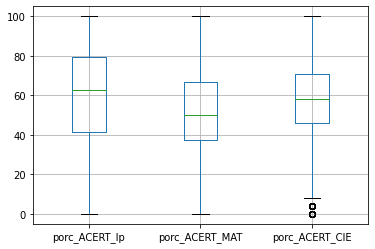

In [160]:
#removing outliers

from scipy import stats

print(len(df[(np.abs(stats.zscore(df['porc_ACERT_CIE'])) > 3)])/len(df.index)) #less than 0.025%
print(len(df[(np.abs(stats.zscore(df['porc_ACERT_MAT'])) > 3)])/len(df.index))
print(len(df[(np.abs(stats.zscore(df['porc_ACERT_lp'])) > 3)])/len(df.index))

df.boxplot(column=['porc_ACERT_lp',
       'porc_ACERT_MAT', 'porc_ACERT_CIE'])  

Since there are less than 0.025% of data that are outliers, there will be no great negative effects in dropping it

In [161]:
df = df[(np.abs(stats.zscore(df['porc_ACERT_CIE'])) < 3)]
type(df)
 

pandas.core.frame.DataFrame

Preparing df's for each specific target column

In [162]:
df_cie = df 
df_mat = df
df_lp = df
df_cie_test = df_teste
df_mat_test = df_teste
df_lp_test = df_teste


In [163]:
print(set(df_cie_test.columns) - set(df_cie.columns))
print(set(df_mat_test.columns) - set(df_mat.columns))
print(set(df_lp_test.columns) - set(df_lp.columns))
df_mat.columns

set()
set()
set()


Index(['CD_ALUNO', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
       'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40',
       'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50',
       'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60',
       'Q61', 'Q62', 'SERIE_ANO', 'TP_SEXO', 'Tipo_PROVA', 'Tem_Nec',
       'porc_ACERT_lp', 'porc_ACERT_MAT', 'porc_ACERT_CIE', 'nivel_profic_lp',
       'nivel_profic_mat', 'nivel_profic_cie', 'Q63_A', 'Q63_B', 'Q63_C',
       'Q63_D', 'RegiaoMetropolitana_Interior',
       'RegiaoMetropolitana_Região Metropolitana da Baixada Santista',
       'RegiaoMetropolitana_Região Metropolitana de Campinas',
       'RegiaoMetropolitana_Região Metropolitana de Ribeirão Preto',
       'RegiaoMetropolitana_Região Metropolitana de Sorocaba'

In [164]:
def tranform_into_lin_reg(df):
    """Drop all the categorical columns in the dataframe lin_reg_df"""
    if 'nivel_profic_mat' in df.columns:
        df = df.drop(columns=['nivel_profic_mat'])
    if 'nivel_profic_lp' in df.columns:
        df = df.drop(columns=['nivel_profic_lp'])
    if 'nivel_profic_cie' in df.columns:
        df = df.drop(columns=['nivel_profic_cie'])
    return df


df_cie_lr = tranform_into_lin_reg(df_cie)
print(get_categorical_columns(df_cie_lr))
df_mat_lr = tranform_into_lin_reg(df_mat)
print(get_categorical_columns(df_mat_lr))
df_lp_lr  = tranform_into_lin_reg(df_lp)
print(get_categorical_columns(df_lp_lr))
df_cie_lr_test = tranform_into_lin_reg(df_cie_test)
print(get_categorical_columns(df_cie_lr_test))
df_mat_lr_test = tranform_into_lin_reg(df_mat_test)
print(get_categorical_columns(df_mat_lr_test))
df_lp_lr_test = tranform_into_lin_reg(df_lp_test)
print(get_categorical_columns(df_lp_lr_test))


['SERIE_ANO', 'Tipo_PROVA']
['SERIE_ANO', 'Tipo_PROVA']
['SERIE_ANO', 'Tipo_PROVA']
['SERIE_ANO', 'Tipo_PROVA']
['SERIE_ANO', 'Tipo_PROVA']
['SERIE_ANO', 'Tipo_PROVA']


In [165]:
df_cie_lr.columns

Index(['CD_ALUNO', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
       'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40',
       'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50',
       'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60',
       'Q61', 'Q62', 'SERIE_ANO', 'TP_SEXO', 'Tipo_PROVA', 'Tem_Nec',
       'porc_ACERT_lp', 'porc_ACERT_MAT', 'porc_ACERT_CIE', 'Q63_A', 'Q63_B',
       'Q63_C', 'Q63_D', 'RegiaoMetropolitana_Interior',
       'RegiaoMetropolitana_Região Metropolitana da Baixada Santista',
       'RegiaoMetropolitana_Região Metropolitana de Campinas',
       'RegiaoMetropolitana_Região Metropolitana de Ribeirão Preto',
       'RegiaoMetropolitana_Região Metropolitana de Sorocaba',
       'RegiaoMetropolitana_Região Metropolitana de São Paulo',


In [113]:
# drop CD_ALUNO
df_cie_lr = df_cie_lr.drop(columns=['CD_ALUNO'])
df_mat_lr = df_mat_lr.drop(columns=['CD_ALUNO'])
df_lp_lr = df_lp_lr.drop(columns=['CD_ALUNO'])
df_cie_lr_test = df_cie_lr_test.drop(columns=['CD_ALUNO'])
df_mat_lr_test = df_mat_lr_test.drop(columns=['CD_ALUNO'])
df_lp_lr_test = df_lp_lr_test.drop(columns=['CD_ALUNO'])



In [114]:
"""Function to normalize the data"""
def normalize_data(df):
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    scaler = StandardScaler()
    scaler.fit(df)
    return scaler.transform(df)
df_cie_lr = pd.DataFrame(normalize_data(df_cie_lr), columns=df_cie_lr.columns,index=df_cie_lr.index)
df_mat_lr = pd.DataFrame(normalize_data(df_mat_lr), columns=df_mat_lr.columns,index=df_mat_lr.index)
df_lp_lr = pd.DataFrame(normalize_data(df_lp_lr), columns=df_lp_lr.columns,index=df_lp_lr.index)
df_cie_lr_test = pd.DataFrame(normalize_data(df_cie_lr_test), columns=df_cie_lr_test.columns,index=df_cie_lr_test.index)
df_mat_lr_test = pd.DataFrame(normalize_data(df_mat_lr_test), columns=df_mat_lr_test.columns,index=df_mat_lr_test.index)
df_lp_lr_test = pd.DataFrame(normalize_data(df_lp_lr_test), columns=df_lp_lr_test.columns,index=df_lp_lr_test.index)



In [115]:
df_cie_lr.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,RegiaoMetropolitana_Região Metropolitana de Ribeirão Preto,RegiaoMetropolitana_Região Metropolitana de Sorocaba,RegiaoMetropolitana_Região Metropolitana de São Paulo,RegiaoMetropolitana_Região Metropolitana do Vale do Paraíba e Litoral Norte,idade,PERIODO_MANHÃ,PERIODO_NOITE,PERIODO_TARDE,Tipo_PROVA_A,Tipo_PROVA_C
count,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05,...,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05,1.205660e+05
mean,1.049024e-16,-4.315142e-16,-1.772732e-16,1.222584e-16,-7.637836e-17,-1.132710e-16,7.331380e-17,5.504428e-17,2.946696e-18,4.537912e-16,...,-6.793608e-17,4.019294e-17,1.379054e-17,2.805255e-17,1.909459e-16,-1.155105e-17,3.500675e-17,-1.183393e-16,-1.284760e-17,1.941283e-16
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.267496e+00,-3.377497e+00,-3.135009e+00,-2.476635e+00,-2.898725e+00,-2.301823e+00,-2.741345e+00,-1.998341e+00,-2.144420e+00,-4.759523e+00,...,-2.427251e-01,-2.432228e-01,-8.052361e-01,-2.898989e-01,-2.331061e+00,-1.465640e+00,-3.518703e-01,-5.116614e-01,-3.021914e-02,-3.309161e+01
25%,-1.267496e+00,-1.946253e-01,-2.276916e-01,-7.694097e-01,-9.628269e-01,-6.803548e-01,-9.233868e-01,-4.262935e-01,-7.622820e-01,3.296665e-01,...,-2.427251e-01,-2.432228e-01,-8.052361e-01,-2.898989e-01,-3.037048e-01,-1.465640e+00,-3.518703e-01,-5.116614e-01,-3.021914e-02,3.021914e-02
50%,3.099038e-01,-1.946253e-01,7.414143e-01,8.420298e-02,5.122103e-03,1.303794e-01,-1.440754e-02,3.597300e-01,6.198564e-01,3.296665e-01,...,-2.427251e-01,-2.432228e-01,-8.052361e-01,-2.898989e-01,1.017663e-01,6.822956e-01,-3.518703e-01,-5.116614e-01,-3.021914e-02,3.021914e-02
75%,3.099038e-01,8.663319e-01,7.414143e-01,9.378157e-01,9.730711e-01,9.411137e-01,8.945717e-01,1.145754e+00,6.198564e-01,3.296665e-01,...,-2.427251e-01,-2.432228e-01,1.241872e+00,-2.898989e-01,9.127086e-01,6.822956e-01,-3.518703e-01,-5.116614e-01,-3.021914e-02,3.021914e-02
max,3.464702e+00,8.663319e-01,7.414143e-01,9.378157e-01,9.730711e-01,9.411137e-01,8.945717e-01,1.145754e+00,6.198564e-01,3.296665e-01,...,4.119886e+00,4.111456e+00,1.241872e+00,3.449478e+00,1.632061e+01,6.822956e-01,2.841956e+00,1.954418e+00,3.309161e+01,3.021914e-02


In [116]:
"""Function to split the data into train and validation sets"""
from sklearn.model_selection import train_test_split
def split_data(df, target, validation_size):
    X = df.drop(columns=[target])
    y = df[target]
    return train_test_split(X, y, test_size=validation_size, random_state=42)

    
X_train_cie, X_val_cie, y_train_cie, y_val_cie = split_data(df_cie_lr, 'porc_ACERT_CIE', 0.2)
X_train_mat, X_val_mat, y_train_mat, y_val_mat = split_data(df_mat_lr, 'porc_ACERT_MAT', 0.2)
X_train_lp, X_val_lp, y_train_lp, y_val_lp = split_data(df_lp_lr, 'porc_ACERT_lp', 0.2)


In [117]:
X_test_cie = df_cie_lr_test.drop(columns=['porc_ACERT_CIE'])
X_test_mat = df_mat_lr_test.drop(columns=['porc_ACERT_MAT'])
X_test_lp = df_lp_lr_test.drop(columns=['porc_ACERT_lp'])
y_test_cie = df_cie_lr_test['porc_ACERT_CIE']
y_test_mat = df_mat_lr_test['porc_ACERT_MAT']
y_test_lp = df_lp_lr_test['porc_ACERT_lp']


## Linear Regression

In [118]:
%%time
"""Function to evaluate the model using the validation set and the R2 score"""
def evaluate_model(X_val, y_val, w, b):
    from sklearn.metrics import r2_score
    y_pred = np.dot(X_val, w) + b
    error = y_pred - y_val
    mse = (1/X_val.shape[0]) * np.sum(error**2)
    return mse, r2_score(y_val, y_pred)


CPU times: user 6 µs, sys: 4 µs, total: 10 µs
Wall time: 14.5 µs


In [119]:
%%time
# TODO: Linear Regression. Implement your solution. You cannot use scikit-learn, Keras/TensorFlow, or PyTorch libraries.


def linear_regression(X_train, y_train, X_val, y_val, learning_rate, epochs):
    train_loss, val_loss,  r2_list = [], [], []
    w = np.random.rand(X_train.shape[1])*0.001 - 0.0005
    b = 0
    m = X_train.shape[0]
    for i in range(epochs):
        y_pred = np.dot(X_train, w) + b
        error = y_pred - y_train
        mse = (1/m) * np.sum(error**2)
        w = w - (learning_rate * (1/m) * np.dot(X_train.T, error))
        b = b - (learning_rate * (1/m) * np.sum(error))
        mse_val, r2 = evaluate_model(X_val, y_val, w, b)
        train_loss.append(mse)
        val_loss.append(mse_val)
        r2_list.append(r2)
        if i % 100 == 0:
            print("Epoch: {}, Train Loss: {}, Val Loss: {}, R2: {}".format(
                i, mse, mse_val, r2))
    return w, b, train_loss, val_loss, r2_list


print('Science')
w_cie, b_cie, train_loss_cie, val_loss_cie, r2_cie = linear_regression(
   X_train_cie, y_train_cie, X_val_cie, y_val_cie, 0.01, 1000)
print('Math')
w_mat, b_mat,  train_loss_mat, val_loss_mat, r2_mat = linear_regression(
   X_train_mat, y_train_mat, X_val_mat, y_val_mat, 0.01, 1000)
print('Portuguese')
w_lp, b_lp,  train_loss_lp, val_loss_lp, r2_lp = linear_regression(
   X_train_lp, y_train_lp, X_val_lp, y_val_lp, 0.01, 1000)


Science
Epoch: 0, Train Loss: 1.0010108751508435, Val Loss: 0.9798645458947729, R2: 0.022047949501030617
Epoch: 100, Train Loss: 0.5067849076124425, Val Loss: 0.5034068677858039, R2: 0.49757567956820514
Epoch: 200, Train Loss: 0.48522448214157526, Val Loss: 0.482192058212657, R2: 0.5187490821674989
Epoch: 300, Train Loss: 0.4814269819125148, Val Loss: 0.4785609728003654, R2: 0.522373080442939
Epoch: 400, Train Loss: 0.480334782274382, Val Loss: 0.4775556670912004, R2: 0.5233764240007553
Epoch: 500, Train Loss: 0.4798503540468307, Val Loss: 0.47711845448358636, R2: 0.523812783258687
Epoch: 600, Train Loss: 0.479537151030252, Val Loss: 0.4768331182205701, R2: 0.5240975626036153
Epoch: 700, Train Loss: 0.4792864549944948, Val Loss: 0.4765999196368881, R2: 0.5243303060313073
Epoch: 800, Train Loss: 0.47906693289807595, Val Loss: 0.47639147377069413, R2: 0.5245383450537583
Epoch: 900, Train Loss: 0.4788679409249277, Val Loss: 0.4761990511279383, R2: 0.5247303921268296
Math
Epoch: 0, Train L

In [39]:
%%time
# TODO: Linear Regression. You can use scikit-learn libraries.
from sklearn.linear_model import LinearRegression
def linear_regression_sklearn(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model
model_cie = linear_regression_sklearn(X_train_cie, y_train_cie )
model_mat = linear_regression_sklearn(X_train_mat, y_train_mat)
model_lp = linear_regression_sklearn(X_train_lp, y_train_lp)
print('Science')
print(f'r2: {model_cie.score(X_val_cie, y_val_cie)}')
print('Math')
print(f'r2: {model_mat.score(X_val_mat, y_val_mat)}')
print('Portuguese')
print(f'r2: {model_lp.score(X_val_lp, y_val_lp)}')



Science
r2: 0.5277387313934802
Math
r2: 0.5640692321041819
Portuguese
r2: 0.558988332260711
CPU times: user 13.8 s, sys: 7.98 s, total: 21.8 s
Wall time: 2.36 s


In [40]:
def linear_regression_cv(X_train, y_train, X_val, y_val, learning_rate, epochs):
    train_loss, val_loss,  r2_list = [], [], []
    w = np.random.rand(X_train.shape[1])*0.001 - 0.0005
    b = 0
    m = X_train.shape[0]
    for i in range(epochs):
        y_pred = np.dot(X_train, w) + b
        error = y_pred - y_train
        mse = (1/m) * np.sum(error**2)
        w = w - (learning_rate * (1/m) * np.dot(X_train.T, error))
        b = b - (learning_rate * (1/m) * np.sum(error))
        mse_val, r2 = evaluate_model(X_val, y_val, w, b)
        train_loss.append(mse)
        val_loss.append(mse_val)
        r2_list.append(r2)
    return w, b, train_loss, val_loss, r2_list

In [41]:
from sklearn.model_selection import KFold


def k_fold_lin_reg(df, target):

    kf = KFold(n_splits=10)
    y = df[target]
    X = df.drop(columns=[target])
    final_r2 = []
    print(f"{target}")

    for i in kf.split(X):

        X_train = X.iloc[i[0]]
        X_val = X.iloc[i[1]]
        y_train = y.iloc[i[0]]
        y_val = y.iloc[i[1]]

        w, b, train_loss, val_loss, r2 = linear_regression_cv(
            X_train, y_train, X_val, y_val, 0.01, 1000)
        final_r2.append(r2[-1])

    return final_r2


df_cie_lr_cv = df_cie_lr
df_mat_lr_cv = df_mat_lr
df_lp_lr_cv = df_lp_lr

final_r2_cie = k_fold_lin_reg(df_cie_lr_cv, 'porc_ACERT_CIE')
final_r2_mat = k_fold_lin_reg(df_mat_lr_cv, 'porc_ACERT_MAT')
final_r2_lp = k_fold_lin_reg(df_lp_lr_cv, 'porc_ACERT_lp')

print('Science')
media_cie = 0
for i in final_r2_cie:
    media_cie = media_cie + i
print(f"media cie: {media_cie/10}")
print('Math')
media_mat = 0
for i in final_r2_mat:
    media_mat = media_mat + i
print(f"media mat: {media_mat/10}")
print('Portuguese')
media_lp = 0
for i in final_r2_lp:
    media_lp = media_lp + i
print(f"media lp: {media_lp/10}")


porc_ACERT_CIE
porc_ACERT_MAT
porc_ACERT_lp


KeyboardInterrupt: 


> What are the conclusions? (1-2 paragraphs)
The most obvious conclusion is about time, when the scikit learn library was used to train and validate the models, the total time was 1 s, and when we used our function it took 30 seconds to train. It happened because the library is better optimized than our code, using multi thread programming and many other things.
In terms of results, both produced the same R^2 score for all the models, showing that our solution may be as good as the one from library but much slower



2. (1 point) Use different Gradient Descent (GD) learning rates when optimizing. Compare the GD-based solutions with Normal Equation. What are the conclusions?


In [120]:
# TODO: Gradient Descent (GD) with 3 different learning rates. You can use scikit-learn libraries.
from sklearn.linear_model import SGDRegressor
def linear_regression_sklearn_sgd(X_train, y_train, X_val, y_val, learning_rate, epochs):
    model = SGDRegressor(alpha=learning_rate, max_iter=epochs)
    model.fit(X_train, y_train)
    return model
lrs = [0.1, 0.01, 0.001]
for lr in lrs:
    print("Learning rate: ", lr)
    model_cie_sgd = linear_regression_sklearn_sgd(X_train_cie, y_train_cie, X_val_cie, y_val_cie, lr, 1000)
    model_mat_sgd = linear_regression_sklearn_sgd(X_train_mat, y_train_mat, X_val_mat, y_val_mat, lr, 1000)
    model_lp_sgd = linear_regression_sklearn_sgd(X_train_lp, y_train_lp, X_val_lp, y_val_lp, lr, 1000)
    print(model_cie_sgd.score(X_val_cie, y_val_cie))
    print(model_mat_sgd.score(X_val_mat, y_val_mat))
    print(model_lp_sgd.score(X_val_lp, y_val_lp))

Learning rate:  0.1
0.5194445513799242
0.5560231276129228
0.5502339172451928
Learning rate:  0.01
0.5187275194851213
0.5585106618683389
0.5523362395119682
Learning rate:  0.001
0.521164115270278
0.558756365343219
0.5541318560624998



3. (0.75 point) Sometimes, we need some more complex function to make good prediction. Devise and evaluate a Polynomial Linear Regression model. 


In [ ]:
# TODO: Complex model. You can use scikit-learn libraries.
"""Multi polynomial regression"""
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
def polynomial_regression(X_train, y_train, X_val, y_val, degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    return model
model_cie = polynomial_regression(X_train_cie, y_train_cie, X_val_cie, y_val_cie, 2)
model_mat = polynomial_regression(X_train_mat, y_train_mat, X_val_mat, y_val_mat, 2)
model_lp = polynomial_regression(X_train_lp, y_train_lp, X_val_lp, y_val_lp, 2)
print(model_cie.score(X_val_cie, y_val_cie))
print(model_mat.score(X_val_mat, y_val_mat))
print(model_lp.score(X_val_lp, y_val_lp))



KeyboardInterrupt: 

*texto em itálico*
 > What are the conclusions? What are the actions after such analyses? (1-2 paragraphs)

 


4. (0.5) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

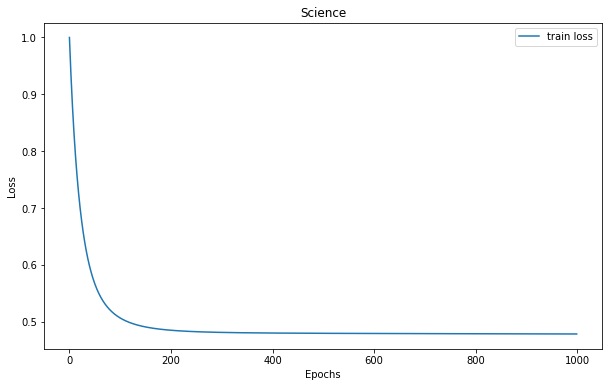

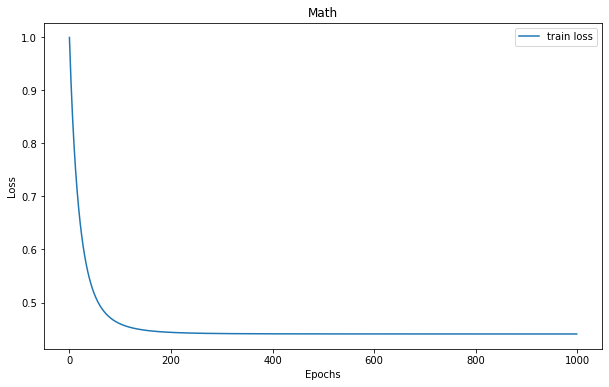

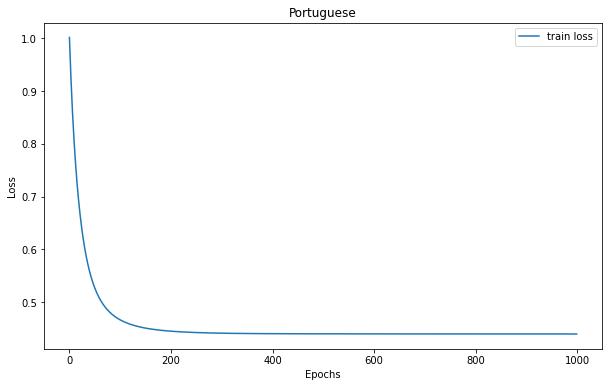

In [42]:
# TODO: Plot the cost function vs. number of iterations in the training set.

def plot_cost_function(train_loss,   title):
    plt.figure(figsize=(10, 6))
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()


plot_cost_function(train_loss_cie,  'Science')
plot_cost_function(train_loss_mat,  'Math')
plot_cost_function(train_loss_lp,  'Portuguese')


In [ ]:
*texto em itálico*
> What are the conclusions? What are the actions after such analyses? (1-2 paragraphs)


SyntaxError: invalid syntax (449369750.py, line 1)

5. (0.25 point) Pick **your best model**, based on your validation set, and predict the target values for the test set.

In [121]:
print(model_cie_sgd.score(X_test_cie, y_test_cie))
print(model_mat_sgd.score(X_test_mat, y_test_mat))
print(model_lp_sgd.score(X_test_lp, y_test_lp))

/home/arthur/.local/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- Tipo_PROVA_A

  warnings.warn(message, FutureWarning)


ValueError: X has 83 features, but SGDRegressor is expecting 84 features as input.

## Logistic Regression

In [44]:
"""Remove the columns used as target in the linear regression"""
def tranform_into_log_reg(df):
    df = df.drop(columns=['porc_ACERT_lp',
       'porc_ACERT_MAT', 'porc_ACERT_CIE'], axis=1)
    return df
df = tranform_into_log_reg(df)
df_teste = tranform_into_log_reg(df_teste)
type(df) 

pandas.core.frame.DataFrame

In [45]:
df.columns

Index(['CD_ALUNO', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
       'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40',
       'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50',
       'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60',
       'Q61', 'Q62', 'SERIE_ANO', 'TP_SEXO', 'Tem_Nec', 'nivel_profic_lp',
       'nivel_profic_mat', 'nivel_profic_cie', 'Q63_A', 'Q63_B', 'Q63_C',
       'Q63_D', 'RegiaoMetropolitana_Interior',
       'RegiaoMetropolitana_Região Metropolitana da Baixada Santista',
       'RegiaoMetropolitana_Região Metropolitana de Campinas',
       'RegiaoMetropolitana_Região Metropolitana de Ribeirão Preto',
       'RegiaoMetropolitana_Região Metropolitana de Sorocaba',
       'RegiaoMetropolitana_Região Metropolitana de São Paulo',
       '

In [46]:
df_log = df
df_log_teste = df_teste
type(df_log)

pandas.core.frame.DataFrame

In [47]:
df_log.drop(columns=['CD_ALUNO'], axis=1, inplace=True)
df_log_teste.drop(columns=['CD_ALUNO'], axis=1, inplace=True)
df_log.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51',
       'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60', 'Q61',
       'Q62', 'SERIE_ANO', 'TP_SEXO', 'Tem_Nec', 'nivel_profic_lp',
       'nivel_profic_mat', 'nivel_profic_cie', 'Q63_A', 'Q63_B', 'Q63_C',
       'Q63_D', 'RegiaoMetropolitana_Interior',
       'RegiaoMetropolitana_Região Metropolitana da Baixada Santista',
       'RegiaoMetropolitana_Região Metropolitana de Campinas',
       'RegiaoMetropolitana_Região Metropolitana de Ribeirão Preto',
       'RegiaoMetropolitana_Região Metropolitana de Sorocaba',
       'RegiaoMetropolitana_Região Metropolitana de São Paulo',
       'RegiaoMetrop

In [ ]:
from sklearn.model_selection import train_test_split
def split_data(df, target, validation_size):
    X = df.drop(columns=[target])
    y = df[target]
    return train_test_split(X, y, test_size=validation_size, random_state=42)
X_train_cie, X_val_cie, y_train_cie, y_val_cie = split_data(df_log, 'nivel_profic_cie', 0.2)
X_train_mat, X_val_mat, y_train_mat, y_val_mat = split_data(df_log, 'nivel_profic_mat', 0.2)
X_train_lp, X_val_lp, y_train_lp, y_val_lp = split_data(df_log, 'nivel_profic_lp', 0.2)
X_teste_cie = df_log_teste.drop(columns=[target])

In [ ]:
def normalize_data(df):
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    scaler = StandardScaler()
    scaler.fit(df)
    return scaler.transform(df)
X_train_cie = normalize_data(X_train_cie)
X_val_cie = normalize_data(X_val_cie)
X_train_mat = normalize_data(X_train_mat)
X_val_mat = normalize_data(X_val_mat)
X_train_lp = normalize_data(X_train_lp)
X_val_lp = normalize_data(X_val_lp)



Now, this part of the assignment aims to predict students' proeficiency level on Portuguese, Mathematics, and Natural Sciences (target values: `nivel_profic_lp`, `nivel_profic_mat` and `nivel_profic_cie`) based on their socioeconomic data. Then, you have to **drop the columns `porc_ACERT_lp`,  `porc_ACERT_MAT`** and  **`porc_ACERT_CIE`**.

### Activities

1. (2.75 points) Perform Multinomial Logistic Regression (_i.e._, softmax regression). It is a generalization of Logistic Regression to the case where we want to handle multiple classes. Try different combinations of features, dropping the ones less correlated to the target variables.

In [ ]:
# TODO: Multinomial Logistic Regression. You can use scikit-learn libraries.
from sklearn.linear_model import LogisticRegression
def multinomial_logistic_regression(X_train, y_train, X_val, y_val, num_epochs = 1000):
    model = LogisticRegression(multi_class='multinomial', solver='sag', max_iter= num_epochs, n_jobs=-1)
    model.fit(X_train, y_train)
    return model
print("Science")
model_cie = multinomial_logistic_regression(X_train_cie, y_train_cie, X_val_cie, y_val_cie)
print("Accuracy: ", model_cie.score(X_val_cie, y_val_cie))
print("Math")
model_mat = multinomial_logistic_regression(X_train_mat, y_train_mat, X_val_mat, y_val_mat)
print("Accuracy: ", model_mat.score(X_val_mat, y_val_mat))
print("Portuguese")
model_lp = multinomial_logistic_regression(X_train_lp, y_train_lp, X_val_lp, y_val_lp)
print("Accuracy: ", model_lp.score(X_val_lp, y_val_lp))


KeyboardInterrupt: 

> What are the conclusions? (1-2 paragraphs)


2. (0.5 point) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

In [ ]:
import sys
import io
import matplotlib.pyplot as plt

class DisplayLossCurve(object):
  def __init__(self, print_loss=False):
    self.print_loss = print_loss

  """Make sure the model verbose is set to 1"""
  def __enter__(self):
    self.old_stdout = sys.stdout
    sys.stdout = self.mystdout = io.StringIO()
  
  def __exit__(self, *args, **kwargs):
    sys.stdout = self.old_stdout
    loss_history = self.mystdout.getvalue()
    loss_list = []
    for line in loss_history.split('\n'):
      if(len(line.split("loss: ")) == 1):
        continue
      loss_list.append(float(line.split("loss: ")[-1]))
    plt.figure()
    plt.plot(np.arange(len(loss_list)), loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()
    if self.print_loss:
      print("=============== Loss Array ===============")
      print(np.array(loss_list))
      
    return True


In [ ]:
"""Function to capture the output of a cell in a notebook"""
def capture_output(cell):
    lista = []
    stdout = sys.stdout
    sys.stdout = io.StringIO()
    cell()
    sys.stdout.seek(0)
    lista.append(sys.stdout.seek(0))
    output = sys.stdout.read()
    lista.append(output)
    sys.stdout = stdout
    return lista
model = LogisticRegression(multi_class='multinomial', solver='sag', max_iter= 100, verbose=1)
capture_output(lambda: model.fit(X_train_cie, y_train_cie))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.6s finished


[0, 'convergence after 66 epochs took 10 seconds\n']

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='sag', max_iter= 100, verbose=1)
model.fit(X_train_cie, y_train_cie)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s finished


LogisticRegression(multi_class='multinomial', solver='sag', verbose=1)

In [ ]:
with open('output.txt', 'w') as f:
    f.write(cap.stdout)

> What are the conclusions? (1-2 paragraphs)


3. (0.75 point) Pick **your best model** and plot the confusion matrix in the **test set**. 


In [ ]:
# TODO: Plot the confusion matrix. You can use scikit-learn, seaborn, matplotlib libraries.


> What are the conclusions? (1-2 paragraphs)


## Deadline

Monday, September 19, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- September 20, 11:59 pm : grade * 0.75
- September 21, 11:59 pm : grade * 0.5
- September 22, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**